In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Data/Real-Data/Real_Combine.csv")


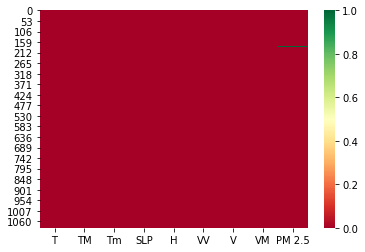

In [3]:
sns.heatmap(df.isnull(),cmap="RdYlGn")

In [4]:
df=df.dropna()

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

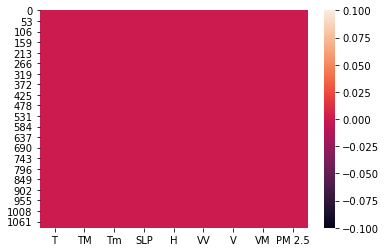

In [6]:
sns.heatmap(df.isnull())

In [7]:
#sns.pairplot(df)

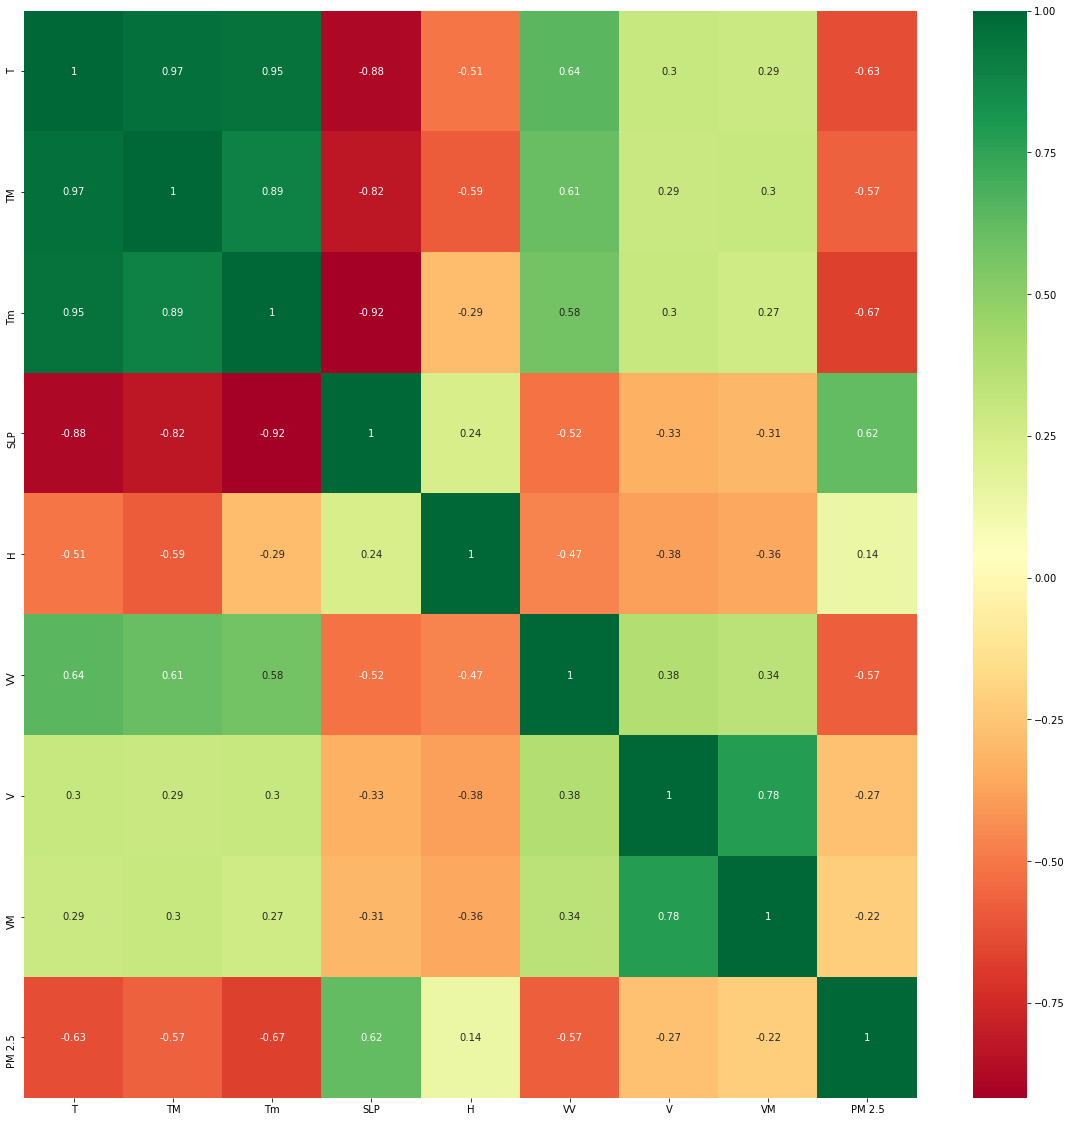

In [8]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# FEATURE SELECTION
# 1.by above correlation
# 2.below TreesRegressor.

In [9]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [10]:
#sns.heatmap(df.isnull(),cmap="RdYlGn")

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [12]:
print(model.feature_importances_)

[0.19443164 0.12379815 0.25329244 0.09069459 0.09129041 0.15646933
 0.05315478 0.03686865]


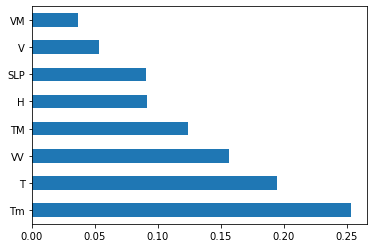

In [13]:
#for visulization pupose you can plot it
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

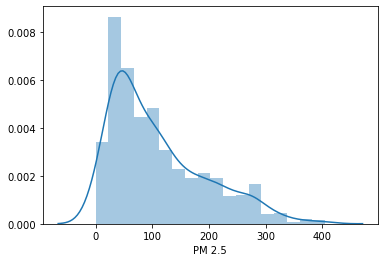

In [14]:
sns.distplot(y)

# TRAIN TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
Lmodel=LinearRegression()
Lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Lmodel.coef_

array([ -0.60393878,   0.5675112 ,  -6.21750986,  -0.35879827,
        -1.02955332, -35.17033428,  -1.87136591,   0.41740288])

In [18]:
Lmodel.intercept_

730.9865870879324

In [19]:
print("Coefficient of determintation R^2 on train set:{}".format(Lmodel.score(X_train,y_train)))

Coefficient of determintation R^2 on train set:0.5084359953030466


In [20]:
#this should be equal  to ONE .....if you get 1 its best model.

In [21]:
print("Coefficient of determintation R^2 on train set:{}".format(Lmodel.score(X_test,y_test)))

Coefficient of determintation R^2 on train set:0.5918271129835573


In [22]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lmodel,x,y,cv=5)

In [23]:
score.mean()

0.4710569304807394

MODEL EVALUATION

In [24]:
coeff_df=pd.DataFrame(Lmodel.coef_,x.columns,columns=["Coeffienct"])

In [25]:
coeff_df

#Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
#Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5 

,Coeffienct
T,-0.603939
TM,0.567511
Tm,-6.217510
SLP,-0.358798
H,-1.029553
VV,-35.170334
V,-1.871366
VM,0.417403


In [26]:
predictions=Lmodel.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
#acc=confusion_matrix(y_test,predictions)

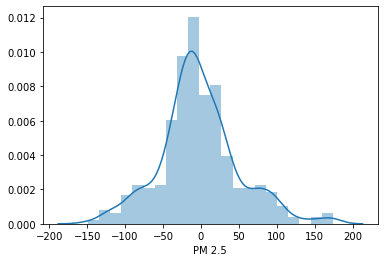

In [29]:
sns.distplot(y_test-predictions)

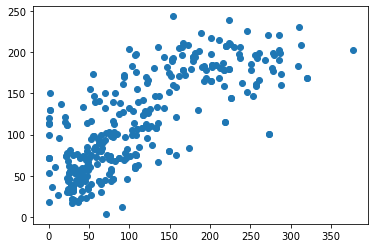

In [30]:
plt.scatter(y_test,predictions)

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 39.16725627636216
MSE: 2778.95267374022
RMSE: 52.71577253289778


In [33]:
import pickle

In [38]:
# open a file, where you ant to store the data
file = open('Linear_model.pkl', 'wb')

# dump information to that file
pickle.dump(Lmodel, file)